<h1>SIT307 Group Assignment 1 notebook</h1>

<h3>Group 3</h3>
<p>By:<br>
    Aaron Norwood,218330434<br>
    Joshua Anthony, 219466473<br>
    Roger Middenway, 217602784<br>
    David Adams, 216110104<br>
    Linden Hutchinson, 218384326<br>
    Dale Orders, 219106283

# Imported libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats
# import plotly.express as px
%matplotlib inline

<h3> Read in the data, store if dataframe

In [2]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

<h4>Tidying

In [3]:
##convert gender to lowercase
df['gender'] = df['gender'].apply(lambda x: x.lower())

# print(len(df[df['gender'] == 'other']))
## drop the one row that has "other" gender to keep things simple
df.drop(index=df[df['gender'] == 'other'].index, inplace=True)

##convert work_type to lowercase ensure consistent spacing 
df['work_type'] = df['work_type'].apply(lambda x: x.lower().replace('_','-'))

##convert residence_type to lowercase
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)
df['residence_type'] = df['residence_type'].apply(lambda x: x.lower())

##convert smoking_status to lowercase ensure consistent spacing 
df['smoking_status'] = df['smoking_status'].apply(lambda x: x.lower().replace(' ', '-'))

## round off age
df['age'] = df['age'].apply(lambda x : round(x))

# cap BMI outliers to a maximum of 60 
df['bmi'] = df['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)

<h4>Imputing

In [4]:
m_df = df[df['gender'] == 'male']
f_df = df[df['gender'] == 'female']

m_bmi_avg = m_df.groupby('age')['bmi'].mean()
f_bmi_avg = f_df.groupby('age')['bmi'].mean()
##round to one to fit with other bmi values
m_bmi_avg = round(m_bmi_avg,1)
f_bmi_avg = round(f_bmi_avg,1)

missing_vals = df[df.isnull().any(axis = 1)]

for index, row in missing_vals.iterrows():
    if row['gender'] == 'male':
        df.loc[index,['bmi']] = m_bmi_avg[row['age']]
    else:
        df.loc[index,['bmi']] = f_bmi_avg[row['age']]

In [5]:
residence_type_map = {
    'urban':0,
    'rural':1
}
df['residence_type'] = df['residence_type'].map(residence_type_map)
# replace marital status with binary values
df['ever_married'] = df['ever_married'].str.lower().map({'yes': 1, 'no': 0})
# replace gender with binary values
df['gender'] = df['gender'].str.lower().map({'male': 1, 'female': 0})

<h4>Binning

In [6]:
# implement age bins
df['age_bin'] = pd.qcut(df['age'], q = 10, precision=1)

# implement glucose bins
df['avg_glucose_level_bin'] = pd.qcut(df['avg_glucose_level'], q=10, precision=1)

# implement bmi bins
df['bmi_bin'] = pd.qcut(df['bmi'], q=10, precision=1)

In [7]:
def add_dummy(target_df, origin_df, col):
    abbrev = col[:2] + '_'
    for cat in origin_df[col].value_counts().index.tolist()[1:]:
        target_df[abbrev + str(cat)] = origin_df[col] == cat
        target_df[abbrev + str(cat)] = target_df[abbrev + str(cat)].map({False: 0, True: 1})


In [8]:
df_dummies = pd.DataFrame(index=df.index)

add_dummy(df_dummies, df, 'work_type')
add_dummy(df_dummies, df, 'smoking_status')
add_dummy(df_dummies, df, 'age_bin')
add_dummy(df_dummies, df, 'avg_glucose_level_bin')
add_dummy(df_dummies, df, 'bmi_bin')

In [9]:
to_add = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'residence_type', 'stroke']
df_dummies[to_add] = df[to_add]

In [10]:
df_dummies.head()

,wo_self-employed,wo_children,wo_govt-job,wo_never-worked,sm_unknown,sm_formerly-smoked,sm_smokes,"ag_(20.0, 30.0]","ag_(-0.1, 11.0]","ag_(30.0, 38.0]",...,"bm_(38.6, 59.7]","bm_(26.6, 28.2]","bm_(19.8, 22.6]","bm_(31.8, 34.2]",gender,hypertension,heart_disease,ever_married,residence_type,stroke
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1


In [11]:
!pip install --user prince

In [12]:
import prince

In [13]:
mca_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status', 'stroke', 'age_bin', 'avg_glucose_level_bin', 'bmi_bin']
df_mca = df[mca_cols]

In [14]:
mca = prince.MCA()

In [15]:
mca.fit(df_mca)
mca.transform(df_mca)

,0,1
0,-0.570810,-1.097015
1,-0.541514,-0.838621
2,-0.372544,-0.587224
3,-0.498538,-0.211728
4,-0.418908,-0.581241
...,...,...
5105,-0.457029,-0.308585
5106,-0.488108,-0.498687
5107,-0.342158,-0.004040
5108,-0.264466,0.041641


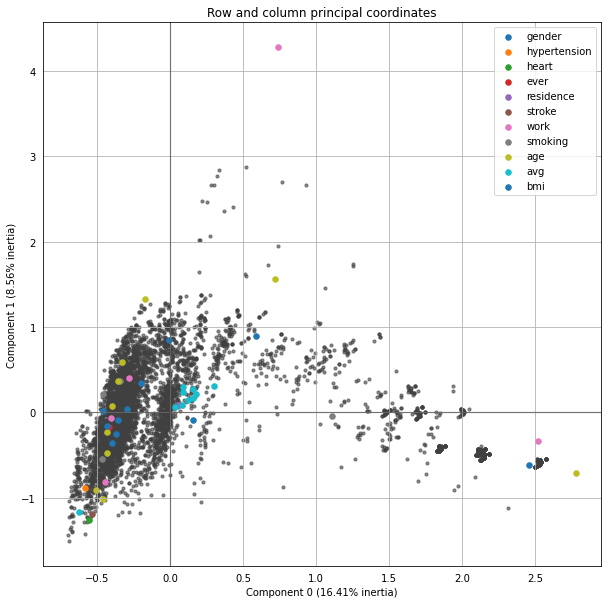

In [16]:
ax = mca.plot_coordinates(
     X=df_mca,
     ax=None,
     figsize=(10, 10),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

In [17]:
mca.row_coordinates(df_mca)

,0,1
0,-0.570810,-1.097015
1,-0.541514,-0.838621
2,-0.372544,-0.587224
3,-0.498538,-0.211728
4,-0.418908,-0.581241
...,...,...
5105,-0.457029,-0.308585
5106,-0.488108,-0.498687
5107,-0.342158,-0.004040
5108,-0.264466,0.041641


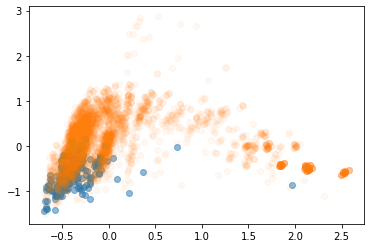

In [18]:
fig, ax = plt.subplots()
ax.scatter(mca.row_coordinates(df_mca)[df['stroke'] == 1][0], mca.row_coordinates(df_mca)[df['stroke'] == 1][1], alpha=0.5)
ax.scatter(mca.row_coordinates(df_mca)[df['stroke'] == 0][0], mca.row_coordinates(df_mca)[df['stroke'] == 0][1], alpha=0.05)

In [19]:
from scipy.cluster.vq import vq, kmeans, whiten

In [20]:
def run_kmeans(centroid_count):
    centroids,_ = kmeans(mca.row_coordinates(df_mca),centroid_count)

    clx,_ = vq(mca.row_coordinates(df_mca), centroids)

    x = mca.row_coordinates(df_mca)[0]
    y = mca.row_coordinates(df_mca)[1]
    labels = list(range(len(centroids)))

    fig, ax = plt.subplots()
    for i, label in enumerate(labels):
        ax.scatter(x[clx == label], y[clx == label], label=label)
        
    return clx

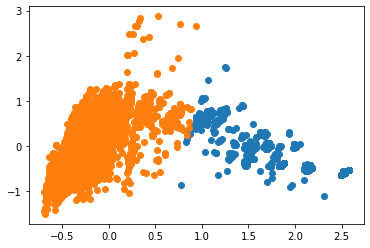

In [21]:
c2 = run_kmeans(2)

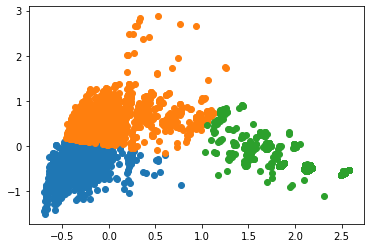

In [22]:
c3 = run_kmeans(3)

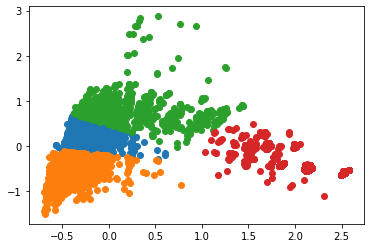

In [23]:
c4 = run_kmeans(4)

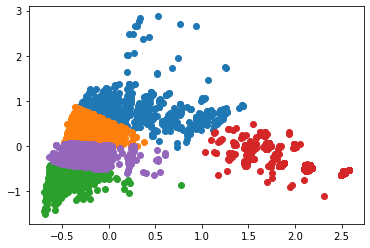

In [24]:
c5 = run_kmeans(5)

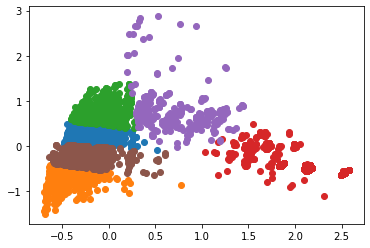

In [25]:
c6 = run_kmeans(6)

In [26]:
df['c2'] = c2
df['c3'] = c3
df['c4'] = c4
df['c5'] = c5
df['c6'] = c6

In [27]:
for val in np.unique(c4):
    print(f'Cluster {val}')
    print(df[df['c4'] == val]['stroke'].value_counts())

Cluster 0
0    2070
1      12
Name: stroke, dtype: int64
Cluster 1
0    1295
1     235
Name: stroke, dtype: int64
Cluster 2
0    916
1      1
Name: stroke, dtype: int64
Cluster 3
0    579
1      1
Name: stroke, dtype: int64


# Testing out kMeans prediction on the features generated by MCA

In [101]:
from sklearn.cluster import KMeans

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_mca.drop('stroke', axis=1), df_mca['stroke'], test_size=0.33, random_state=42)

In [113]:
mca = prince.MCA()
mca.fit(X_train)
mca.transform(X_train)

,0,1
4540,2.133892,-0.486991
3379,-0.401637,0.192421
479,-0.465465,-0.510599
3683,-0.132072,-0.761246
2997,-0.546672,-1.068951
...,...,...
4427,-0.355956,0.037778
466,-0.435893,-0.252534
3092,2.509217,-0.572805
3773,-0.153709,0.498899


In [175]:
weights = np.ones(len(X_train)) + y_train * 20

In [176]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(mca.row_coordinates(X_train), sample_weight=weights)

In [177]:
df_results = pd.DataFrame()
df_results['y_train'] = y_train
df_results['train_clusters'] = kmeans.labels_

In [178]:
print(df_results[df_results['y_train'] == 1].value_counts())
print(df_results[df_results['y_train'] == 0].value_counts())

y_train  train_clusters
1        1                 103
         2                  48
         0                   2
dtype: int64
y_train  train_clusters
0        2                 1869
         1                  967
         0                  434
dtype: int64


In [119]:
result = kmeans.predict(mca.row_coordinates(X_test))

In [120]:
result
# Basically results weren't so good

array([0, 0, 0, ..., 0, 3, 3], dtype=int32)

# Testing kNN on features generated by MCA

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import cohen_kappa_score, roc_curve, f1_score, make_scorer, recall_score
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [30]:
df_knn = mca.row_coordinates(df_mca)
df_knn['stroke'] = df_mca['stroke']
df_knn.head()

,0,1,stroke
0,-0.570810,-1.097015,1
1,-0.541514,-0.838621,1
2,-0.372544,-0.587224,1
3,-0.498538,-0.211728,1
4,-0.418908,-0.581241,1


In [184]:
X = df_knn[[0, 1]]
y = df_knn['stroke']

In [185]:
df_knn

,0,1,stroke
0,-0.570810,-1.097015,1
1,-0.541514,-0.838621,1
2,-0.372544,-0.587224,1
3,-0.498538,-0.211728,1
4,-0.418908,-0.581241,1
...,...,...,...
5105,-0.457029,-0.308585,0
5106,-0.488108,-0.498687,0
5107,-0.342158,-0.004040,0
5108,-0.264466,0.041641,0


In [186]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, plot_confusion_matrix

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
model = KNeighborsClassifier(n_neighbors=50)

In [188]:
model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=50)

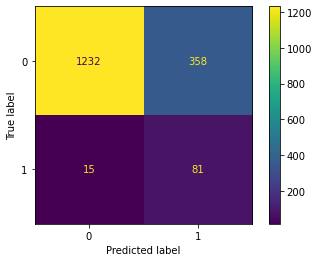

In [189]:
plot_confusion_matrix(model, X_test, y_test)

## (Garbage below, used for searching a good value of k)


In [34]:
def run_knn(X, y, k, scorer):
    model = KNeighborsClassifier(n_neighbors=k)

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    
    return scores
    

In [35]:
scoreses = []
parameses = []
top_score = 0
top_params = {}

ks = list(range(2, 100))

kappa_scorer = make_scorer(cohen_kappa_score)
recall = make_scorer(recall_score)
mean_roc = 'roc_auc'

for k in ks:
    scores = run_knn(X, y, k, recall)
    perf = np.mean(scores)
    params = {'k': k, 'score': perf}
    clear_output(wait=True)
    if perf > top_score:
        top_score = perf
        top_params = params
        print(f'Score: {perf:.3f} - new best')
    else:
        print(f'Score: {perf:.3f} - top score is {top_score:.3f}')
    scoreses.append(scores)
    parameses.append(params)

Score: 0.000 - top score is 0.128


KeyboardInterrupt: 

In [ ]:
top_params

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([x.mean() for x in scoreses]);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(model, X_test, y_test)